# Preprocessing and data exploration

First, import the pandas package in order to load the csv file as a dataframe, then rename the columns for easier processing purposes. You can consult the original header name through the header dictionary. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame.from_csv('ODI-2019-csv.csv', header=0, sep=';', index_col=0, parse_dates=True)

/home/marvin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [3]:
columns_df = list(df.columns) 

In [4]:
columns_df

['What programme are you in?',
 'Have you taken a course on machine learning?',
 'Have you taken a course on information retrieval?',
 'Have you taken a course on statistics?',
 'Have you taken a course on databases?',
 'What is your gender?',
 'Chocolate makes you.....',
 'When is your birthday (date)?',
 'Number of neighbors sitting around you?',
 'Did you stand up?',
 'You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then? ',
 'Give a random number',
 'Time you went to be Yesterday',
 'What makes a good day for you (1)?',
 'What makes a good day for you (2)?',
 'What is your stress level (0-100)?']

In [5]:
header_dict = {}
for i in range(len(columns_df)):
    header_dict[i] = columns_df[i]
header_dict
    

{0: 'What programme are you in?',
 1: 'Have you taken a course on machine learning?',
 2: 'Have you taken a course on information retrieval?',
 3: 'Have you taken a course on statistics?',
 4: 'Have you taken a course on databases?',
 5: 'What is your gender?',
 6: 'Chocolate makes you.....',
 7: 'When is your birthday (date)?',
 8: 'Number of neighbors sitting around you?',
 9: 'Did you stand up?',
 10: 'You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then? ',
 11: 'Give a random number',
 12: 'Time you went to be Yesterday',
 13: 'What makes a good day for you (1)?',
 14: 'What makes a good day for you (2)?',
 15: 'What is your stress level (0-100)?'}

In [180]:
df.columns = range(len(columns_df))
df.head()

Pie chart of male-female ratio

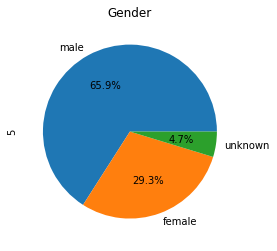

In [7]:
df[5].value_counts().plot(y = "test", kind = 'pie', title = 'Gender',autopct='%1.1f%%')

Pie chart of the answers to the question 'Have you taken a course in Machine Learning before'

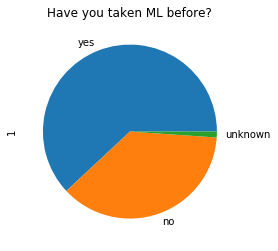

In [8]:
df[1].value_counts().plot(kind = 'pie', title = 'Have you taken ML before?')

Pie chart of the answers to the question 'Have you taken a course on Information Retrieval before'

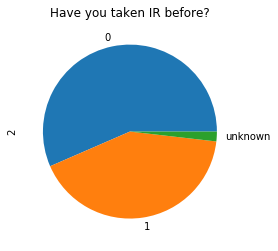

In [9]:
df[2].value_counts().plot(kind = 'pie', title = 'Have you taken IR before?')

Pie chart of the answers to the question 'Have you taken a course on Statistics before'

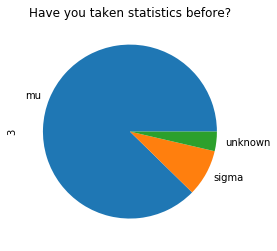

In [10]:
df[3].value_counts().plot(kind = 'pie', title = 'Have you taken statistics before?')

Pie chart of the answers to the question 'Have you taken a course on Databases before'

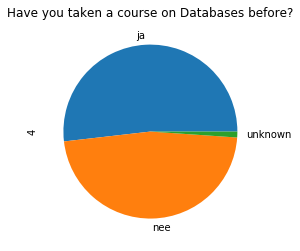

In [11]:
df[4].value_counts().plot(kind = 'pie', title = 'Have you taken a course on Databases before?')

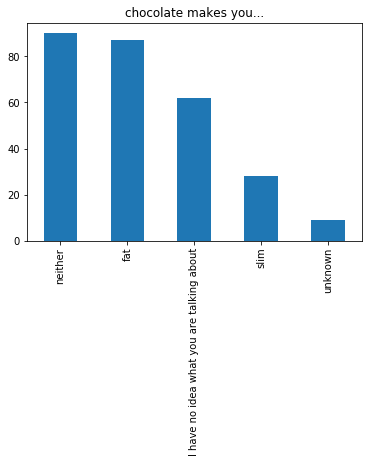

In [12]:
df[6].value_counts().plot(kind = 'bar', title = 'chocolate makes you...')

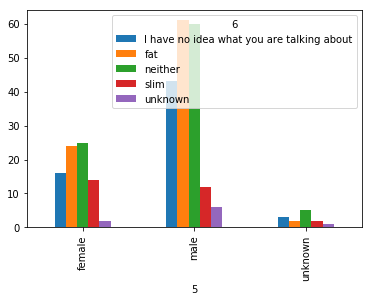

In [13]:
df.groupby([5])[6].value_counts().unstack().plot(kind='bar')

Number of neighbours sitting around you: top 10

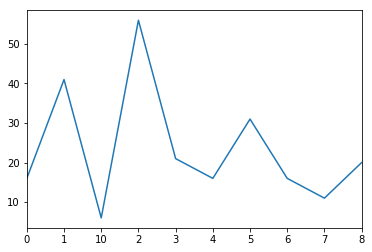

In [14]:
df[8].value_counts()[:10].sort_index().plot()

Give a random numbr top 10

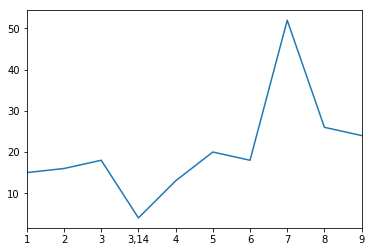

In [15]:
df[11].value_counts()[:10].sort_index().plot()

Did you stand up?

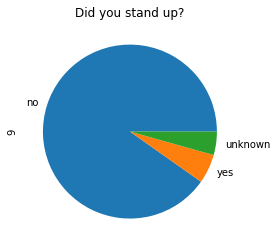

In [16]:
df[9].value_counts().plot(kind='pie', title = 'Did you stand up?')

What is your stress level?

In [17]:
boolean_list = []
for stresslevel in df[15]:
    try:
        if 0 < int(stresslevel) and int(stresslevel) < 100:
            boolean_list.append(True)
        else:
            boolean_list.append(False)
    except:
        boolean_list.append(False)

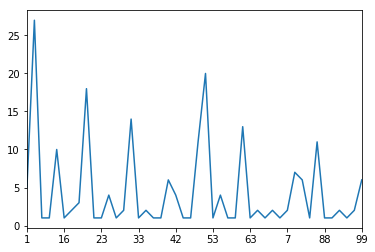

In [18]:
df[boolean_list][15].value_counts().sort_index().plot()

In [110]:
#df[0].unique()

In [78]:
ai = ["ai","artificial intelligence"]
ai_answer = []
ai_indices = []

ai_counter = 0 ;
for i,name in enumerate(df[0]):
    for synonym in ai:
        if synonym in name.lower():
            ai_counter += 1
            ai_indices.append(i)
            if name not in ai_answer:
                ai_answer.append(name)
                print(name)
            break
print(ai_counter)  
print(ai_indices)

AI
master AI
Artificial Intelligence
M AI
MSc Artificial Intelligence 
MSc Artificial Intelligence: Cognitive Science
MSc Artificial Intelligence
Ai
Artificial intelligence
Artificial Intelligence Master
UvA AI
ai
75
[0, 1, 5, 9, 12, 21, 22, 23, 24, 26, 39, 43, 50, 51, 53, 59, 61, 65, 67, 74, 76, 77, 78, 79, 81, 84, 86, 92, 100, 104, 107, 108, 109, 110, 113, 116, 118, 119, 123, 128, 136, 140, 141, 143, 145, 148, 150, 153, 156, 159, 163, 165, 168, 173, 178, 182, 186, 189, 194, 195, 197, 198, 200, 203, 205, 208, 218, 222, 242, 247, 251, 258, 265, 273, 275]


In [209]:
cs = ["cs","computer science","master computer science","cs (exchange)","mscs","computer science"]

cs_answer = []
cs_indices = []

counter = 0 ;
for i,name in enumerate(df[0]):
    for synonym in cs:
        #if synonym == name.lower() or "computer science" in name.lower():
        if synonym == name.lower() or "computer science" in name.lower():
            counter += 1
            cs_indices.append(i)
            if name not in cs_answer:
                cs_answer.append(name)
                print(name)
            break
print(counter) 
print(cs_indices)

Computer Science
cs
CS
MsCS
MSc Computer Science (Big Data Engineering)
Computer Science (joint degree)
Master Computer Science
computer science
CS (Exchange)
Computer Science - internet and web technologies
Computer Science Big Data Engineering Master
Computer science masters
Computer Science 
33
[2, 4, 35, 45, 49, 52, 57, 60, 66, 111, 117, 126, 138, 155, 158, 174, 188, 199, 207, 213, 216, 225, 230, 232, 250, 252, 254, 255, 257, 261, 263, 266, 272]


In [193]:
#BA 41

ba = ['ba','analytics']
ba_answer = []
ba_indices = []

counter = 0 ;
for i,name in enumerate(df[0]):
    for synonym in ba:
        if synonym in name.lower(): # and not "mba" in name.lower():
            counter += 1
            ba_indices.append(i)
            if name not in ba_answer:
                ba_answer.append(name)
                print(name)
            break
print(counter) 
print(ba_indices)

Business Analytics
BA
Business Analytics 
Business Analytics and Data Science
mBA
42
[13, 14, 17, 19, 29, 38, 42, 58, 63, 68, 73, 87, 91, 94, 95, 96, 97, 99, 102, 106, 115, 124, 131, 142, 151, 154, 175, 192, 201, 211, 214, 215, 217, 224, 226, 238, 240, 243, 245, 264, 270, 271]


In [194]:
#econometrics 15

ecom = ['econometrics']
ecom_answer = []
ecom_indices = []

counter = 0 ;
for i,name in enumerate(df[0]):
    for synonym in ecom:
        if synonym in name.lower() and not "financial" in name.lower():
            counter += 1
            ecom_indices.append(i)
            if name not in ecom_answer:
                ecom_answer.append(name)
                print(name)
            break
print(counter) 
print(ecom_indices)

Econometrics
Master Econometrics & OR
Econometrics and Operations Research
Econometrics 
Master Econometrics
15
[3, 15, 16, 37, 54, 98, 101, 132, 157, 185, 190, 193, 227, 229, 239]


In [198]:
#bioinformatics 31

bio = ['bioinformatics','bio','informatic']
bio_answer = []
bio_indices = []

counter = 0 ;
for i,name in enumerate(df[0]):
    for synonym in bio:
        if synonym in name.lower()and not "medical" in name.lower():
            counter += 1
            bio_indices.append(i)
            if name not in bio_answer:
                bio_answer.append(name)
                print(name)
            break
print(counter) 
print(bio_indices)

MSc Bioinformatics & Systems Biology
Bioinformatics and Systems biology
Bioinformatics
Master of Bioinformatics and system biology
Bioinformatics and Systems Biology
Bioinformatics and System biology
Bioinformatics and Systems Biology MsC
BioSB
M bioinformatics
Bioinformatics and Systems Biology 
Bioinf
bioinformatics 
MSc Bioinformatic
Msc Bioinformatics
Boinformatics
Bioinformatics & Systems Biology
Bioinformatics and Systems Biology Master's
Bioinformatics and Biology Systems
Bioinformatics and systems biology 
31
[6, 7, 10, 18, 20, 25, 28, 32, 36, 41, 46, 64, 71, 89, 90, 121, 133, 134, 146, 162, 166, 167, 170, 179, 180, 187, 196, 209, 236, 241, 260]


In [159]:
#qrm

qrm = ["qrm","quantitative risk management"]
qrm_answer = []
qrm_indices = []

counter = 0 ;
for i,name in enumerate(df[0]):
    for synonym in qrm:
        if synonym in name.lower() :
            counter += 1
            qrm_indices.append(i)
            if name not in qrm_answer:
                qrm_answer.append(name)
                print(name)
print(counter) 
print(qrm_indices)

Quantitative Risk Management 
QRM
MSc QRM (DHP)
Quantitative Risk Management
Duisenberg QRM
DHPQRM
11
[33, 34, 88, 120, 152, 160, 176, 181, 206, 220, 237]


In [140]:
#computational science

com = ['computational science',"cls"]
com_answer = []
com_indices = []

counter = 0 ;
for i,name in enumerate(df[0]):
    for synonym in com:
        if synonym in name.lower() :
            counter += 1
            com_indices.append(i)
            if name not in com_answer:
                com_answer.append(name)
                print(name)
print(counter) 
print(com_indices)

CLS
Computational Science
Computational Science 
Computational science 
Computational science
Computational Science joint degree
CLSJD
MSc Computational Science
Cls
30
[8, 11, 27, 40, 44, 48, 75, 85, 112, 114, 127, 129, 130, 147, 149, 161, 169, 172, 177, 184, 191, 234, 235, 249, 253, 256, 259, 262, 268, 269]


In [165]:
#data science

ds = ['data science','ds']
ds_answer = []
ds_indices = []

counter = 0 ;
for i,name in enumerate(df[0]):
    for synonym in ds:
        if synonym in name.lower() and not "analytics" in name.lower() and not "information" in name.lower():
            counter += 1
            ds_indices.append(i)
            if name not in ds_answer:
                ds_answer.append(name)
                print(name)
print(counter) 
print(ds_indices)

MA Data Science (UvA)
DS
2
[31, 139]


In [204]:
l = df[0].value_counts()
#l.axes
program_names = {"AI":75, "CS":33,"BA":4,"Econometrics":15,"Bioinformatics":31,"CLS":30,"QRM":11}

for i,programme in enumerate(l.index):
    skip = False
    for synonym in ai:
        if synonym in programme.lower():
            skip = True
            break
    for synonym in cs:
        if synonym == programme.lower() or "computer science" in programme.lower():
            skip = True
            break
    for synonym in ba:
        if synonym in programme.lower(): #and not "mba" in programme.lower():
            skip = True
            break
    for synonym in ecom:
        if synonym in programme.lower() and not "financial" in programme.lower():
            skip = True
            break
    for synonym in bio:
        if synonym in programme.lower() and not "medical" in programme.lower():
            skip = True
            break
    for synonym in com:
        if synonym in programme.lower() :
            skip = True
            break
    for synonym in qrm:
        if synonym in programme.lower() :
            skip = True
            break
    for synonym in ds:
        if synonym in programme.lower() and not "analytics" in programme.lower() and not "information" in name.lower():
            skip = True
            break
    if not skip:
        value_count = l[i]
        program_names[programme] = value_count

#print(program_names.items())
pd.Series(program_names)

AI                                                                                    75
CS                                                                                    33
BA                                                                                     4
Econometrics                                                                          15
Bioinformatics                                                                        31
CLS                                                                                   30
QRM                                                                                   11
Finance                                                                                3
Digital Business & Innovation                                                          2
Master Digital Business and Innovation                                                 2
Business Administration                                                                2
Master Management, Po

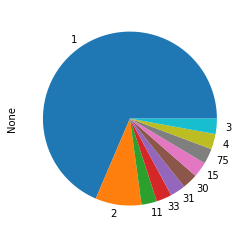

In [205]:
pd.Series(program_names).value_counts().plot(kind='pie') 

In [208]:
for i,name in enumerate(df[0]):
    for synonym in ai:
        if synonym in programme.lower():
            skip = True
            df[0][i] = "AI"
            break
    for synonym in cs:
        if synonym == programme.lower() or "computer science" in programme.lower():
            skip = True
            df[0][i] = "Computer Science"
            break
    for synonym in ba:
        if synonym in programme.lower(): #and not "mba" in programme.lower():
            skip = True
            df[0][i] = "Business analytics"
            break
    for synonym in ecom:
        if synonym in programme.lower() and not "financial" in programme.lower():
            skip = True
            df[0][i] = "Econometrics"
            break
    for synonym in bio:
        if synonym in programme.lower() and not "medical" in programme.lower():
            skip = True
            df[0][i] = "Bioinformatics"
            break
    for synonym in com:
        if synonym in programme.lower() :
            skip = True
            df[0][i] = "Computational Science"
            break
    for synonym in qrm:
        if synonym in programme.lower() :
            skip = True
            df[0][i] = "QRM"
            break
    for synonym in ds:
        if synonym in programme.lower() and not "analytics" in programme.lower() and not "information" in name.lower():
            skip = True
            df[0][i] = "Data science"
            break
df.head

<bound method NDFrame.head of                                                                0        1   \
Timestamp                                                                    
2019-03-27 10:16:11                                            AI      yes   
2019-04-01 15:58:21                                            AI       no   
2019-04-01 15:59:07                              Computer Science      yes   
2019-04-01 15:59:30                                  Econometrics      yes   
2019-04-01 15:59:58                                            cs       no   
2019-04-01 16:00:01                                            AI      yes   
2019-04-01 16:00:12          MSc Bioinformatics & Systems Biology      yes   
2019-04-01 16:00:16            Bioinformatics and Systems biology      yes   
2019-04-01 16:00:21                                           CLS       no   
2019-04-01 16:00:31                                            AI      yes   
2019-04-01 16:00:52               

In [221]:
df.loc[df[5] == "male"]
#plt.scatter(df[0],df[5])
#plt.scatter(male.stature, male.span, color='blue');
#plt.xlabel('height (m)')
#plt.ylabel('span (m)');

#print('mean           ', female.stature.mean())
#print('std dev.       ', female.stature.std())
#print('median         ', female.stature.median())
#print('standard error ', female.stature.sem())
#people = pd.concat([male, female])
#people = people.sample(frac=1)
#gender_cat = people.Gender.astype('category')
#people.Gender.cat.codes

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Timestamp,,,,,,,,,,,,,,,,
2019-04-01 15:58:21,AI,no,0,mu,ja,male,fat,09071992,1,no,0,7,3,DM,AI,1
2019-04-01 15:59:07,Computer Science,yes,1,unknown,ja,male,neither,04/08/95,0,unknown,0,0,0,0,0,100
2019-04-01 15:59:30,Econometrics,yes,1,mu,ja,male,fat,29-09-1993,2,no,42,"1,645","0,3",Winning,Food,0
2019-04-01 15:59:58,cs,no,1,mu,ja,male,neither,0212,2,no,second,66,20,kiss,love,100
2019-04-01 16:00:01,AI,yes,1,mu,ja,male,unknown,31-12-1994,0,yes,Barkie,420,0000,Ganja,Sun,100
2019-04-01 16:00:16,Bioinformatics and Systems biology,yes,1,mu,ja,male,I have no idea what you are talking about,22/07/1996,0,yes,Don't so much,5,"24,3",Stay with my friends,Sun,50
2019-04-01 16:00:21,CLS,no,0,mu,ja,male,neither,30-02-1945,0,no,0,31,03:30,Done something useful,Had fun,0
2019-04-01 16:00:31,AI,yes,1,mu,nee,male,neither,22,Infinite,no,Above average,5,02:00,A sunny day,Relax walks,80
2019-04-01 16:00:52,Bioinformatics,yes,0,mu,nee,male,neither,10/06/1991,470,no,20,3851,11,sun,sleep,150
